In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [2]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [23]:
df['Year'] = df.Day.dt.year
df['Month'] = df.Day.dt.month
s = df.groupby(['Year'])['t'].mean()
print(s.idxmin(), s.idxmax())

2012 2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [43]:
df.groupby(['Year']).apply(lambda x: x[(x['t'] >= 0) & (x['Month'] == 1)]['t'].count()).idxmax()

2008

**3.** В каком году было самое холодное лето (по средней температуре)

In [52]:
df.groupby(['Year']).apply(lambda x: x[(x['Month'] >= 6) & (x['Month'] <= 8) ]['t'].mean()).idxmin()

2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [58]:
print(df.Day[(df['t'] - df['t'].shift(1)).abs().idxmax()])

2014-05-27 00:00:00


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

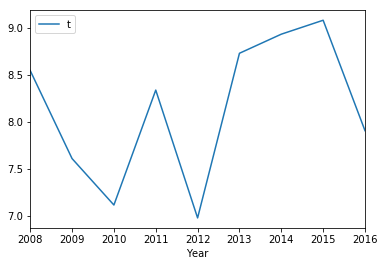

In [61]:
%matplotlib inline
df.pivot_table(['t'], ['Year'], aggfunc = 'mean').plot()